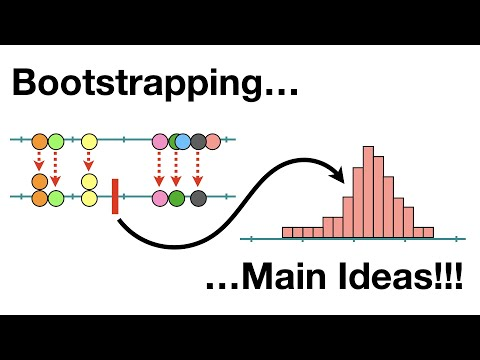

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo('Xz0x-8-cgaQ', width=800, height=500)

# Pre-lecture HW

## Question 1: SD measures the spread of data within a single sample, while SEM measures the variability of sample mean across multiple samples.

## Question 2: First find the sample mean to calculate SD, then use SD to calculate SEM. After we got the value of SEM, we multiply SEM with 1.96 and multiply the result with the sample mean to get a 95% confidence interval which "covers 95% of the bootstrapped sample".

## Question 3: First generate a large amount of bootstrapped samples and calculate the mean of each bootstrapped sample. Then you sort the means from smallest to largest and identify the 2.5th percentile and the 97.5th percentile of the sorted means. The range between 2.5th percentile and the 97.5th percentile is the 95% bootstrapped confidence interval.

In [1]:
import numpy as np

In [2]:
# Create a list for sample data
sample_data = np.array([12, 15, 14, 10, 18, 20, 22, 9, 14, 17])

In [3]:
# Number of bootstrap samples
n_bootstrap = 10000

In [4]:
# Create a list for bootstrap sample's mean
bootstrap_means = []

In [6]:
for i in range(n_bootstrap):
    # Resample with replacement from the original sample
    bootstrap_sample = np.random.choice(sample_data, size=len(sample_data), replace=True)
    # Store the data in the list created before.
    bootstrap_means.append(np.mean(bootstrap_sample))

In [8]:
# Sort the data from smallest to greatest.
bootstrap_means = np.sort(bootstrap_means)
bootstrap_means

array([10.4, 10.7, 10.7, ..., 19.5, 19.6, 19.9])

In [9]:
# Calculate the 2.5th and 97.5th percentile 
lower_bound = np.percentile(bootstrap_means, 2.5)
upper_bound = np.percentile(bootstrap_means, 97.5)

In [10]:
# Display the 95% confidence interval for the mean
print(f"95% Bootstrap Confidence Interval for the Mean: [{lower_bound}, {upper_bound}]")

95% Bootstrap Confidence Interval for the Mean: [12.7, 17.6]


In [11]:
# Same steps in calculate confidence interval
bootstrap_medians = []
for i in range(n_bootstrap):
    bootstrap_sample = np.random.choice(sample_data, size=len(sample_data), replace=True)
    bootstrap_medians.append(np.median(bootstrap_sample))

In [12]:
bootstrap_medians = np.sort(bootstrap_medians)
bootstrap_medians

array([ 9. ,  9.5,  9.5, ..., 21. , 22. , 22. ])

In [13]:
lower_bound = np.percentile(bootstrap_medians, 2.5)
upper_bound = np.percentile(bootstrap_medians, 97.5)

In [15]:
# Display the 95% confidence interval for the median
print(f"95% Bootstrap Confidence Interval for the Median: [{lower_bound}, {upper_bound}]")

95% Bootstrap Confidence Interval for the Median: [12.0, 18.5]


# Post-lecture HW

## Question 5: We usually do not know the true value of the population  parameter, so we use the sample statistic to estimate it. By using the sample statistic to estimate the population parameter, we can understand the purpose of confidence intervals, which is to capture the true value of the population parameter.

## Question 6: The process of bootstrapping is the estimation of an overall parameter, such as the mean or median, by repeated sampling, and the purpose of bootstrapping it's to helps us to understand how different samples taken from the population may result different statistics. Let's say if you have a guess about what the average population is, you can apply bootstrapping. First you will need to create multiple bootstrap samples from your sample n, and each bootstrap sample is the same size as the original sample n. Then calculate the mean of each bootstrap sample. After you get the means plot a histogram of the means of all bootstrap samples. This histogram represents the sampling distribution of your sample means. Check to see if your guess falls within a reasonable range of the distribution of means in the histogram. For example If your guess falls in the extreme tails of the histogram, then your guess is probably not very reasonable.

## Question 7: If the confidence interval contains zero, this means that our sample data is consistent with the probability that the population parameter is actually zero. In other words, we do not have enough evidence that the population parameter is not zero. On the other hand, if the confidence interval does not contain zero, we reject the null hypothesis. This means that our sample data is not consistent with the probability that the population parameter is actually zero. We have sufficient evidence that the population parameter is not zero.

In [21]:
import pandas as pd
import numpy as np

In [36]:
np.random.seed(123)
patient_data = {
    "PatientID": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    "Age": [45, 34, 29, 52, 37, 41, 33, 48, 26, 39],
    "Gender": ['M', 'F', 'M', 'F', 'M', 'F', 'M', 'F', 'M', 'F'],
    "InitialHealthScore": [84, 78, 83, 81, 81, 80, 79, 85, 76, 83],
    "FinalHealthScore": [86, 86, 80, 86, 84, 86, 86, 82, 83, 84]
}
df = pd.DataFrame(patient_data)

patient_data['HealthScoreChange'] = df.FinalHealthScore - df.InitialHealthScore

patient_data

{'PatientID': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
 'Age': [45, 34, 29, 52, 37, 41, 33, 48, 26, 39],
 'Gender': ['M', 'F', 'M', 'F', 'M', 'F', 'M', 'F', 'M', 'F'],
 'InitialHealthScore': [84, 78, 83, 81, 81, 80, 79, 85, 76, 83],
 'FinalHealthScore': [86, 86, 80, 86, 84, 86, 86, 82, 83, 84],
 'HealthScoreChange': 0    2
 1    8
 2   -3
 3    5
 4    3
 5    6
 6    7
 7   -3
 8    7
 9    1
 dtype: int64}

In [38]:
n = 10000
bootstrap_means = []
for i in range(n):
    bootstrap_sample = patient_data['HealthScoreChange'].sample(n=len(patient_data), replace=True)
    bootstrap_means.append(np.mean(bootstrap_sample))

In [52]:
p_value = np.sum(np.array(bootstrap_means) <= 0) / n
p_value

0.0248

In [50]:
confidence_level = 0.95
lower_bound = np.percentile(bootstrap_means, (1 - confidence_level) / 2 * 100)
upper_bound = np.percentile(bootstrap_means, (1 + confidence_level) / 2 * 100)

In [42]:
import plotly.express as px

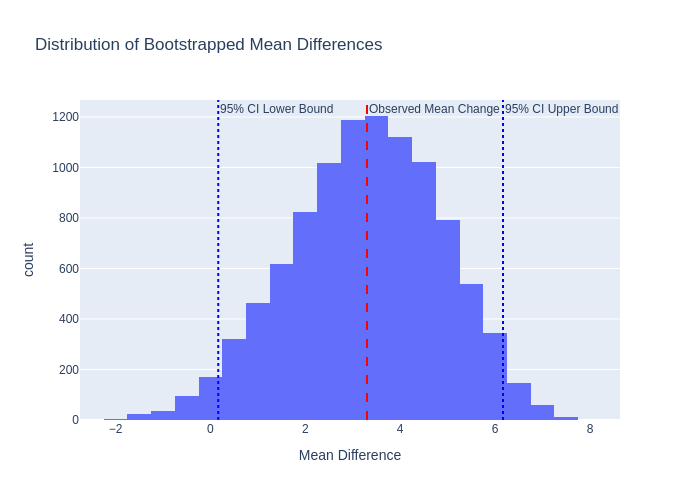

In [51]:
observed_mean_change = patient_data['HealthScoreChange'].mean()

fig = px.histogram(x=bootstrap_means, nbins=30,
                   labels={'x': 'Mean Difference', 'y': 'Frequency'},
                   title='Distribution of Bootstrapped Mean Differences')
fig.add_vline(x=observed_mean_change, line_dash="dash", line_color="red",
              annotation_text="Observed Mean Change", annotation_position="top right")
fig.add_vline(x=lower_bound, line_dash="dot", line_color="blue",
              annotation_text=f"{int(confidence_level*100)}% CI Lower Bound")
fig.add_vline(x=upper_bound, line_dash="dot", line_color="blue",
              annotation_text=f"{int(confidence_level*100)}% CI Upper Bound")
fig.show(renderer="png")


## Question 8: The analysis showed that after the patients were vaccinated. There was an improvement in the health scores, with a positive moral mean change observed, 95% confidence interval excluding zero, and a low p-value (0.0248). These results support the rejection of the null hypothesis of 'no effect', suggesting that the vaccine may have contributed to improved health. However, the sample size of 10 patients is small, and for the reliability and generalizability of the results, we should conduct future vaccine studies on larger populations.

## Question 9: Yes

# Link to ChatGPT conversation: https://chatgpt.com/share/66ffa27c-1010-8003-83ec-773d5b5617d6

Chatgpt conversation summary:

Confidence Intervals and Bootstrapping:
We discussed the difference between standard error of the mean (which measures the precision of the sample mean as an estimate of the population mean) and standard deviation (which measures variability in the original data).

You asked how to create a 95% confidence interval using the standard error of the mean and through bootstrapping. We reviewed the process of bootstrapping, including using the 2.5th and 97.5th percentiles to estimate a 95% confidence interval.

Code for Bootstrapped Confidence Interval:
I provided Python code to calculate a 95% bootstrapped confidence interval for the mean, and explained how to adapt the code to calculate a confidence interval for the median or other statistics.

Understanding Python Concepts:
We clarified the use of the underscore (_) in loops, meaning it is a placeholder when the loop variable is not needed.
We explained the function of append, which adds elements to a list, and size=len(sample_data), which ensures that the resampled data in bootstrapping has the same size as the original sample.

Vaccine Data Analysis Assignment:
We reviewed the task where you need to analyze vaccine data to evaluate its effectiveness.

I provided a step-by-step approach, including:
An introduction to the problem and null hypothesis.
A visualization of the data using boxplots to compare initial and final health scores.
A quantitative analysis of the data using bootstrapping to calculate the confidence interval for the mean difference in health scores.
Methodology explanation with code, supporting visualizations, and a conclusion based on hypothesis testing.
Suggestions for additional considerations like sample size limitations, ethical concerns, and future research.
You now have code, methodology, and a structured outline for the vaccine data analysis assignment, along with clarifications on key concepts like bootstrapping, confidence intervals, and Python syntax.